<a href="https://colab.research.google.com/github/simonepascucci/progettoLAB-IA/blob/main/ScannerANPR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install easyocr
!pip install imutils

In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr
from google.colab.patches import cv2_imshow

Input image:


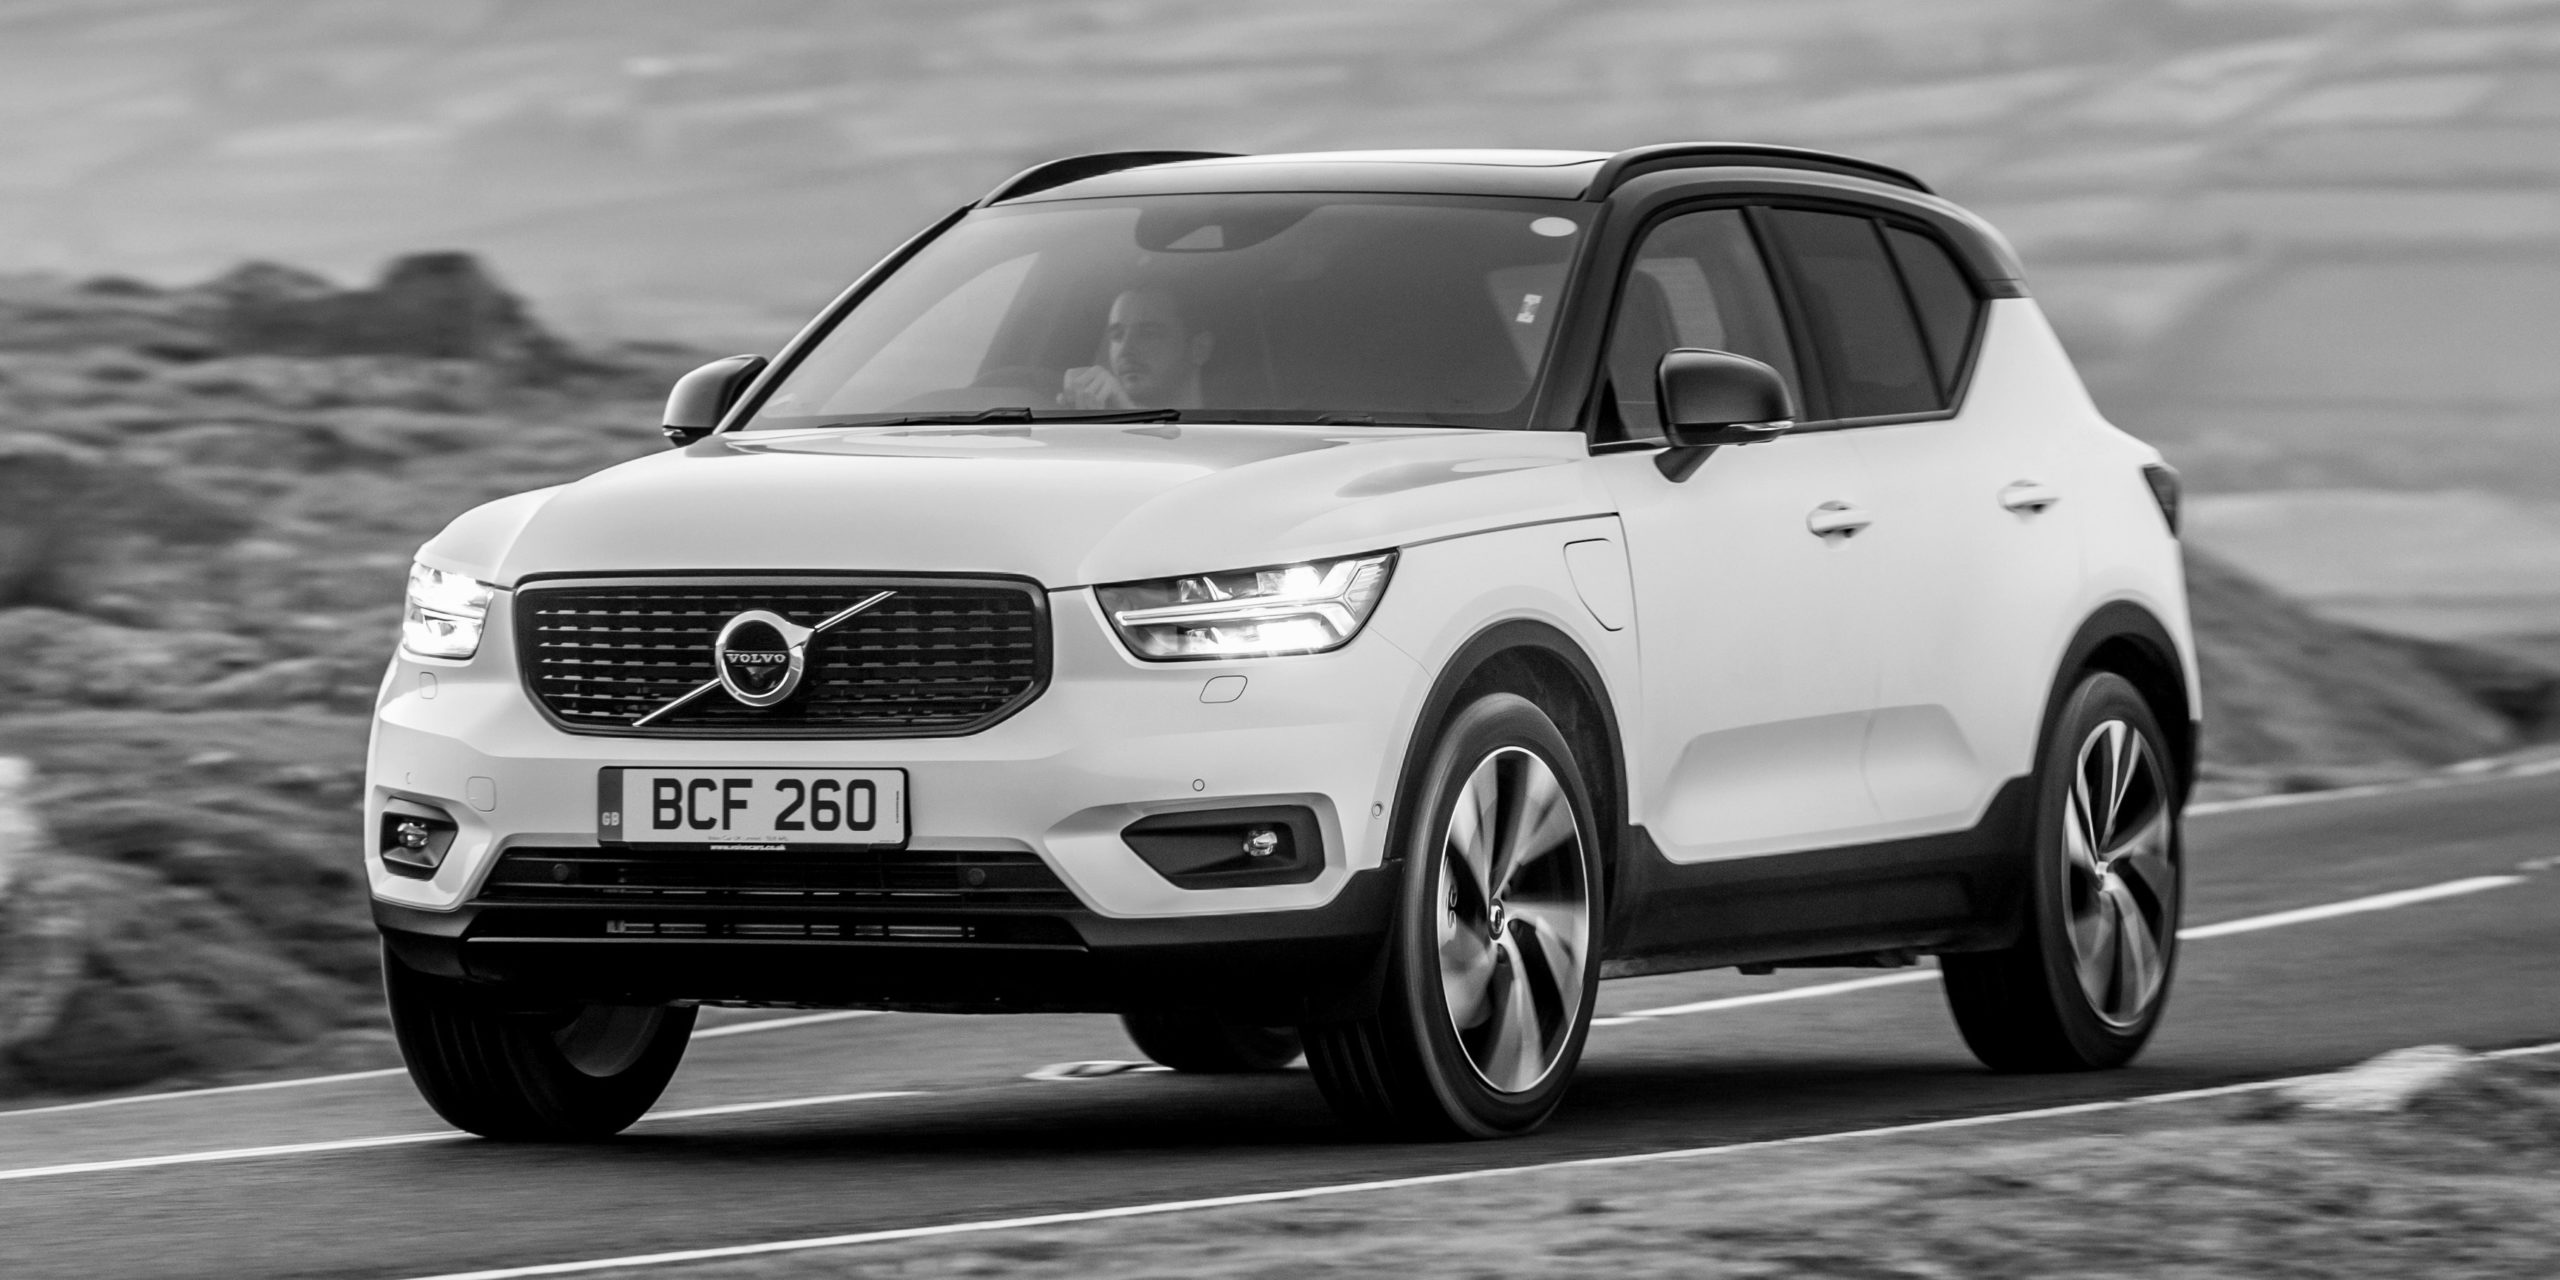

In [4]:
img = cv2.imread('/content/sample2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print("Input image:")
cv2_imshow(gray)

Edge detection:


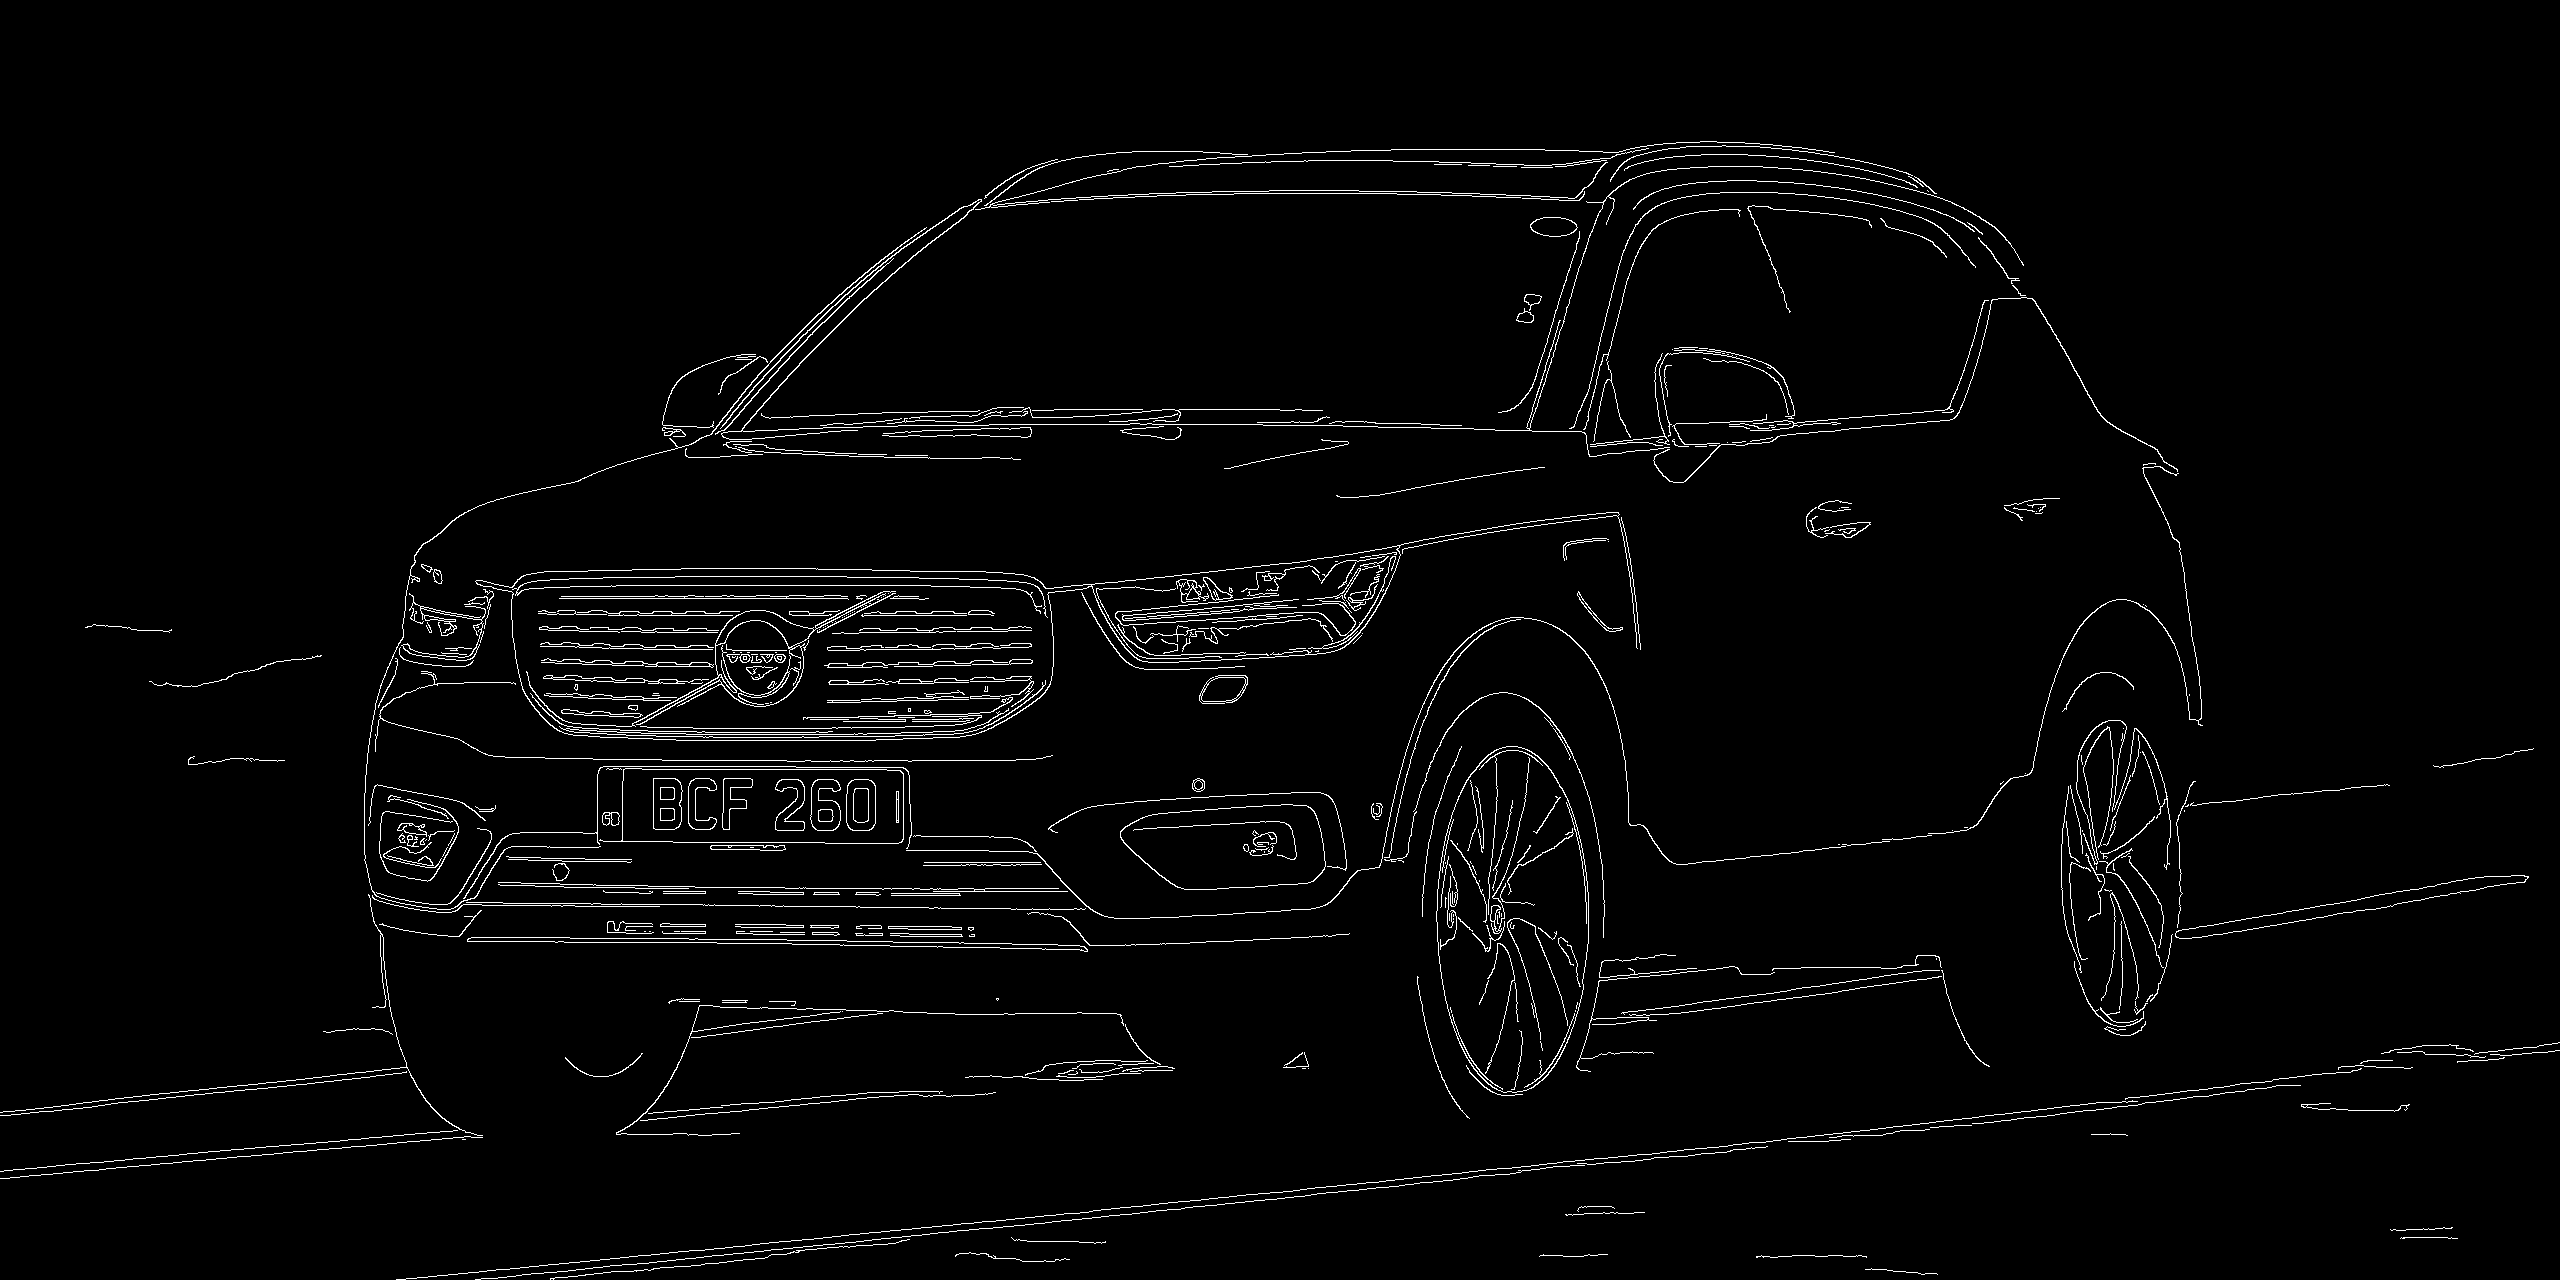

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
print("Edge detection:")
cv2_imshow(edged)

In [8]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True) #sample6 21 in place of 10
    if len(approx) == 4:
        location = approx
        break
location

array([[[623, 770]],

       [[899, 770]],

       [[903, 838]],

       [[623, 841]]], dtype=int32)

Plate extraction:


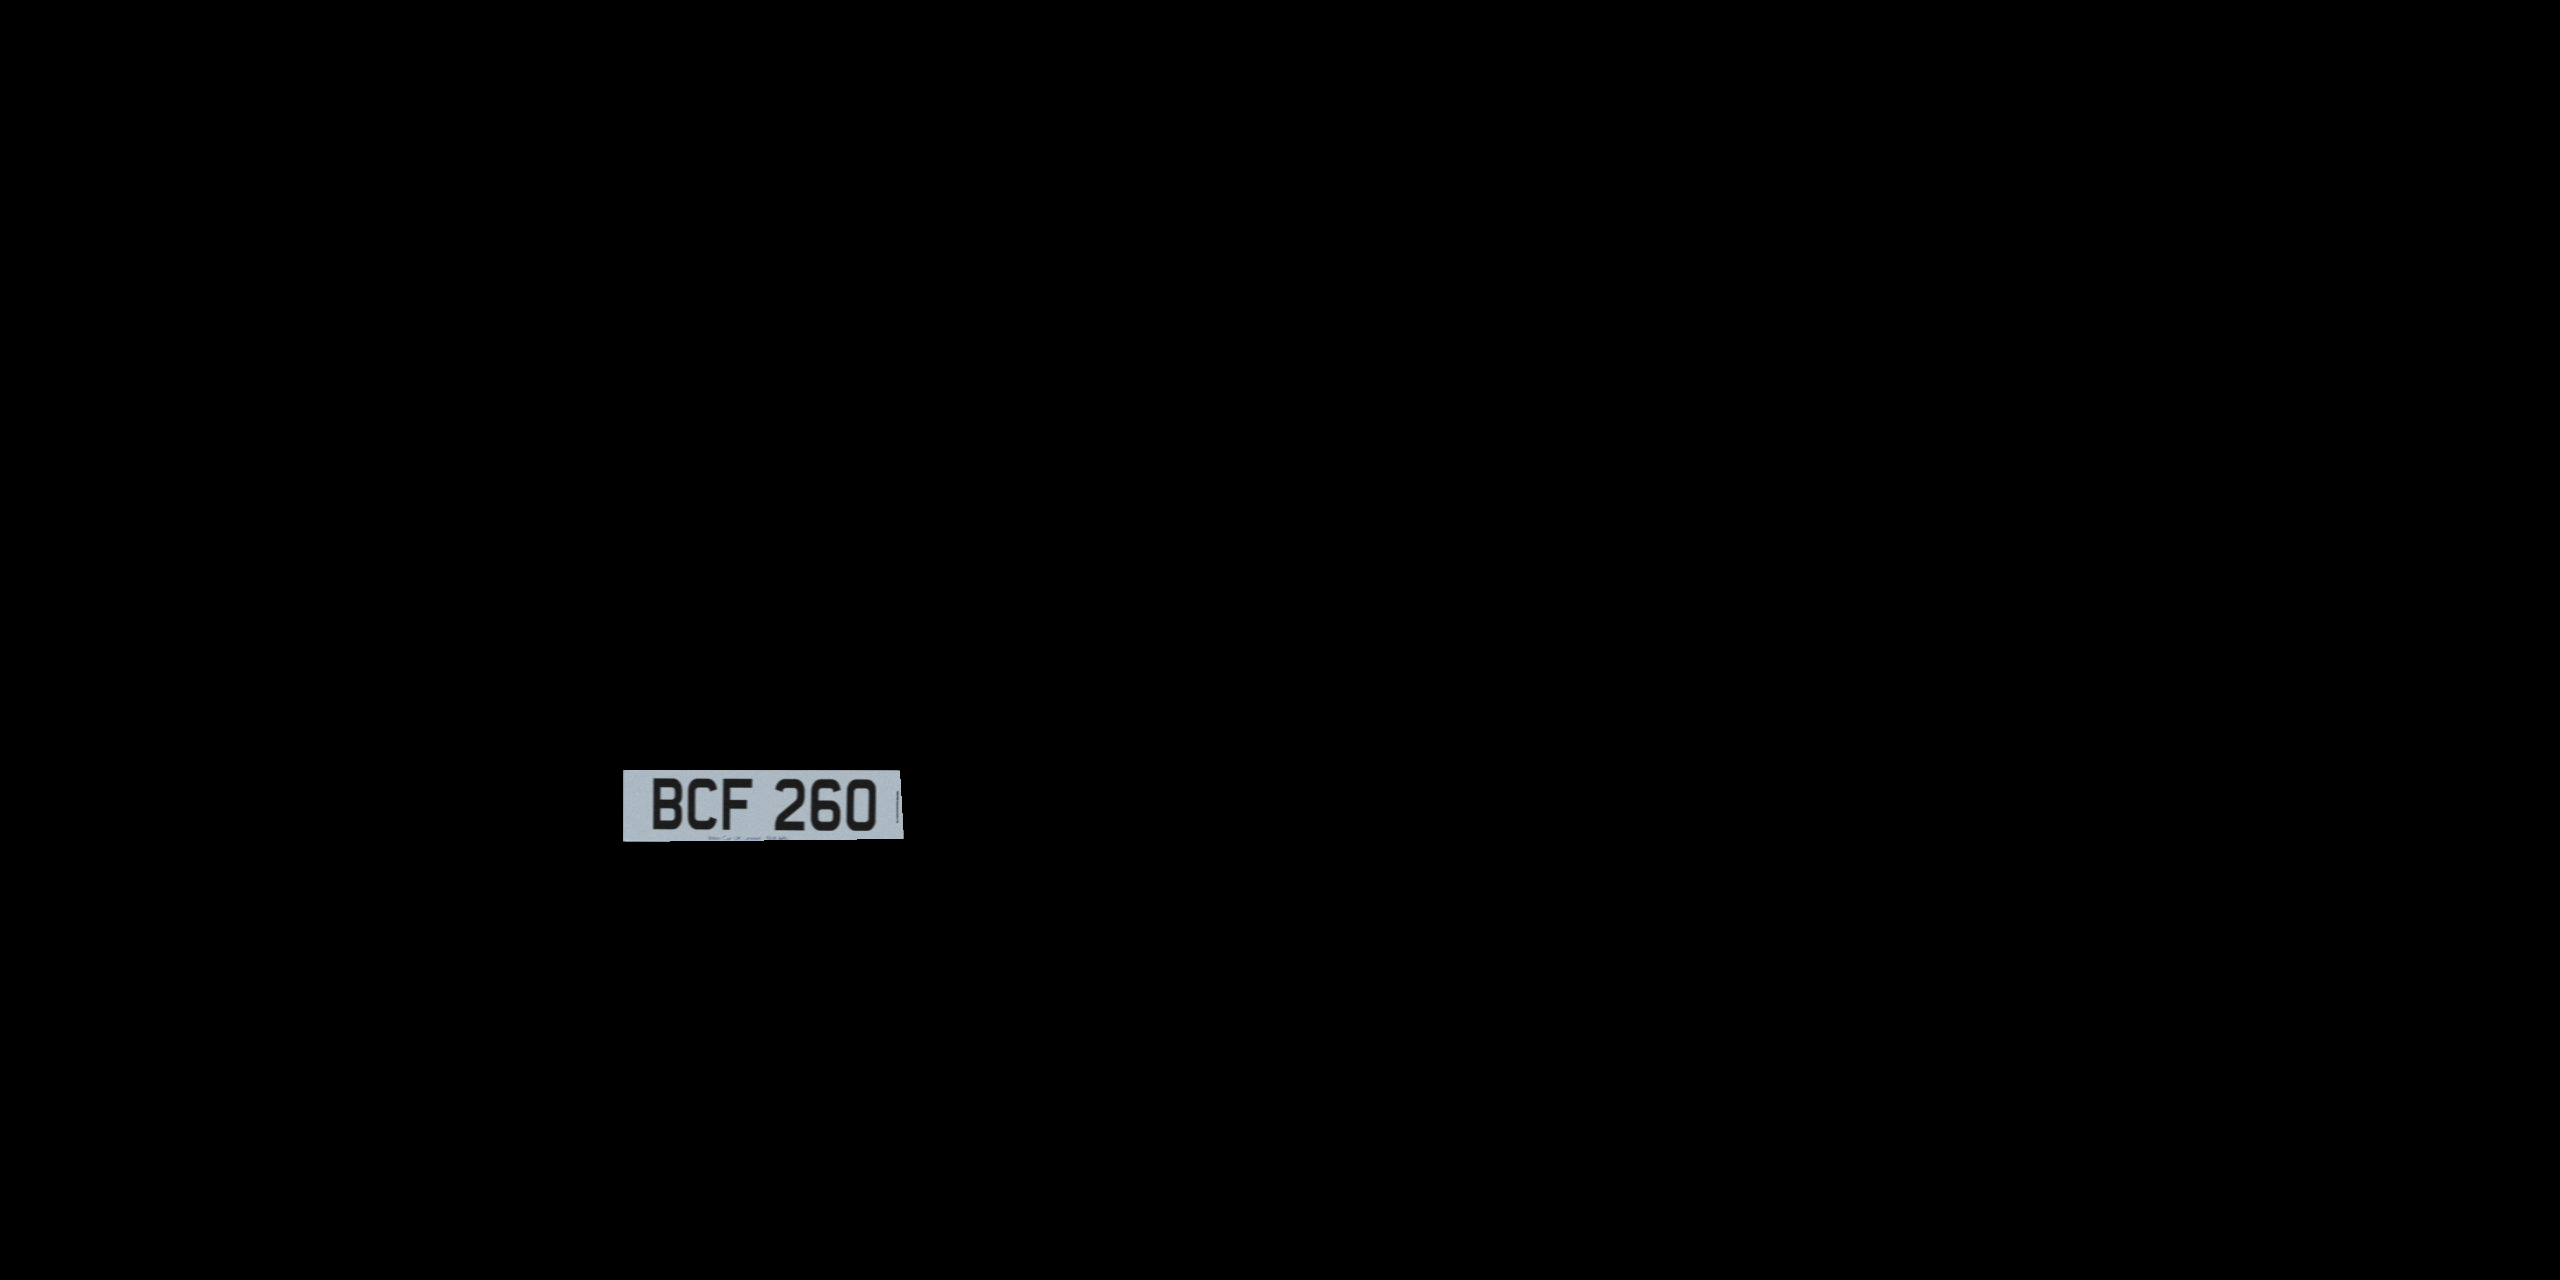

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
print("Plate extraction:")
cv2_imshow(new_image)

Plate:


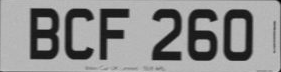

In [10]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
print("Plate:")
cv2_imshow(cropped_image)

In [11]:
reader = easyocr.Reader(['it'])
result = reader.readtext(cropped_image)
text = result[0][-2]
text = text.upper()

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Recognized plate: BCF 260


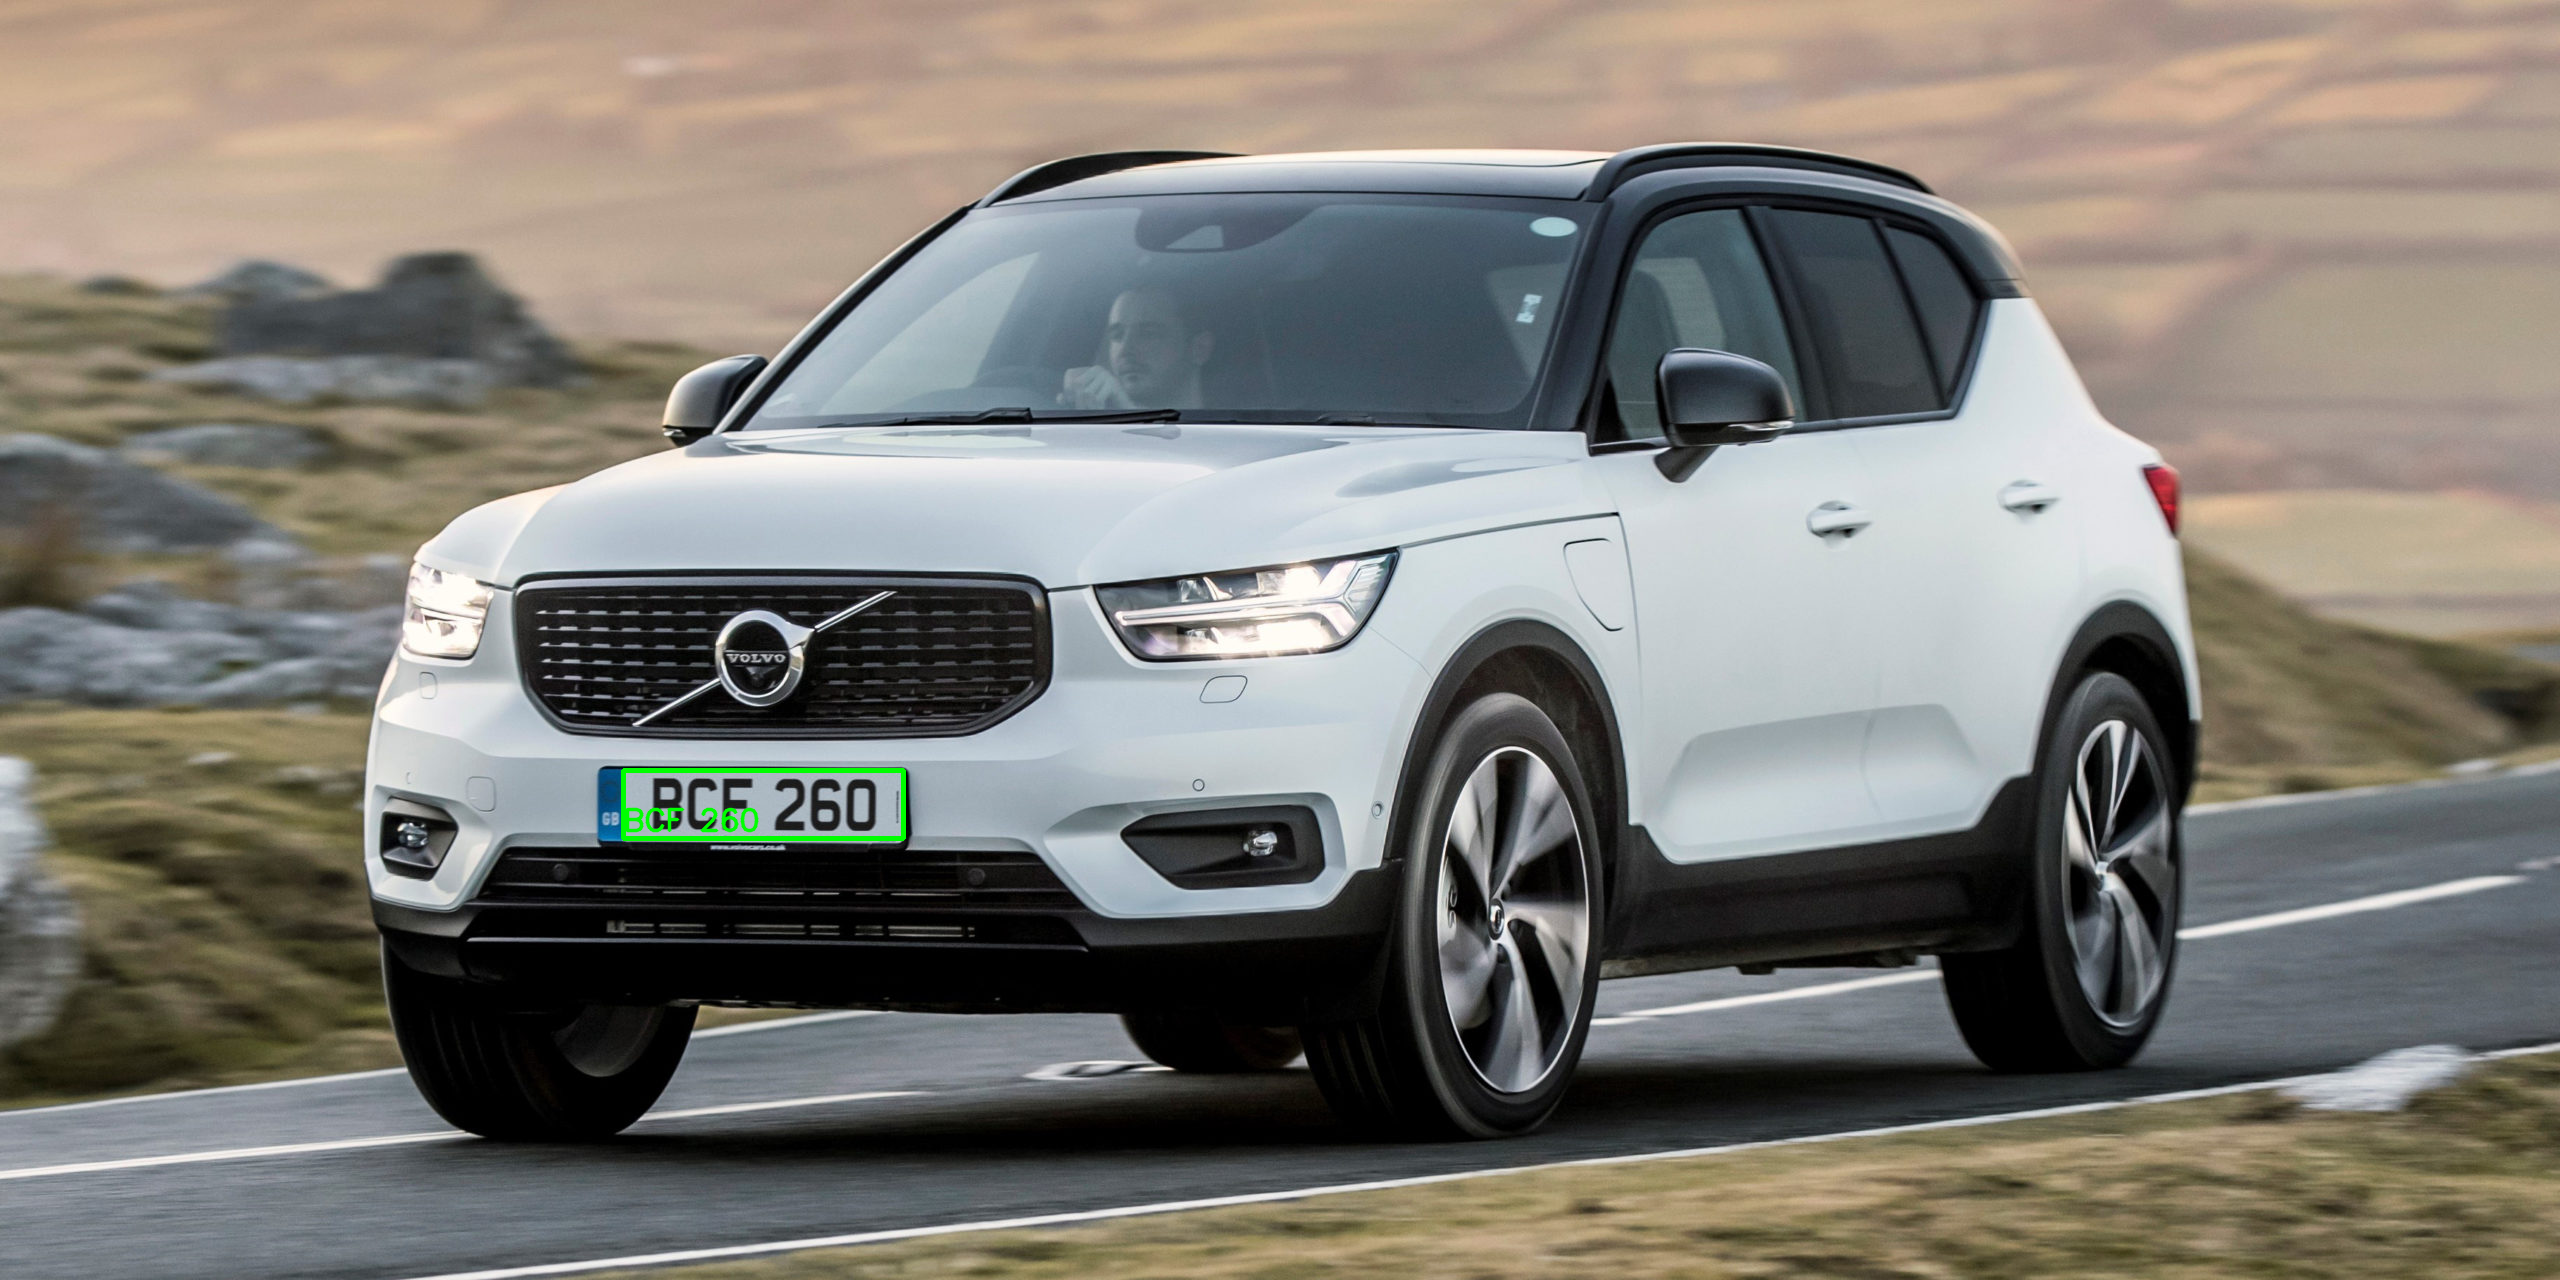

In [12]:
print("Recognized plate: "+text)
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
cv2_imshow(res)